<a href="https://colab.research.google.com/github/naman-omar/Spam_SMS_Classifier/blob/main/SpamSMSClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/spam.csv", encoding="latin1")
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.rename(columns = {'v1': 'target', 'v2': 'SMS'}, inplace=True)

In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

,0
target,0
SMS,0


In [6]:
df.duplicated().sum()

np.int64(403)

In [7]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df['target'].value_counts()

,count
target,
0,4516
1,653


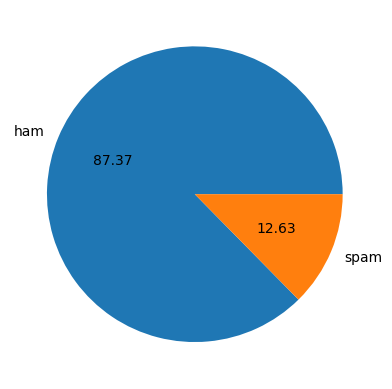

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [12]:
import nltk

In [13]:
!pip install nltk

In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
df['num_char'] = df['SMS'].apply(len)

In [16]:
df.head()

,target,SMS,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['num_char']

,num_char
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [18]:
df['num_word'] = df['SMS'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,SMS,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_sent'] = df['SMS'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,SMS,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['num_char', 'num_sent', 'num_word']].describe()

,num_char,num_sent,num_word
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [21]:
df[df['target'] == 0][['num_char', 'num_sent', 'num_word']].describe()

,num_char,num_sent,num_word
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [22]:
df[df['target'] == 1][['num_char', 'num_sent', 'num_word']].describe()

,num_char,num_sent,num_word
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

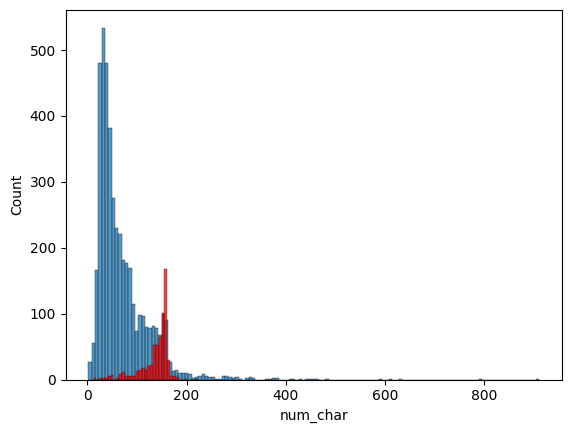

In [24]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<Axes: xlabel='num_word', ylabel='Count'>

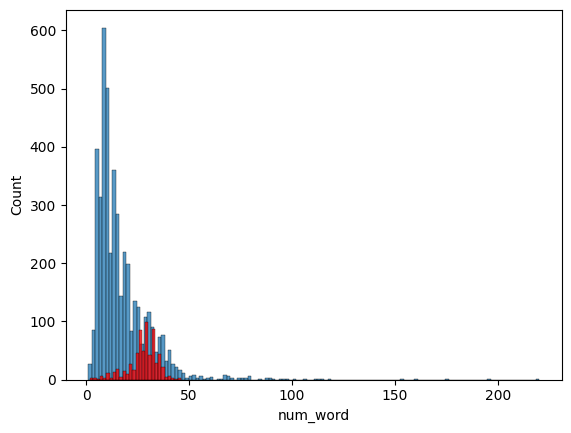

In [25]:
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'], color='red')

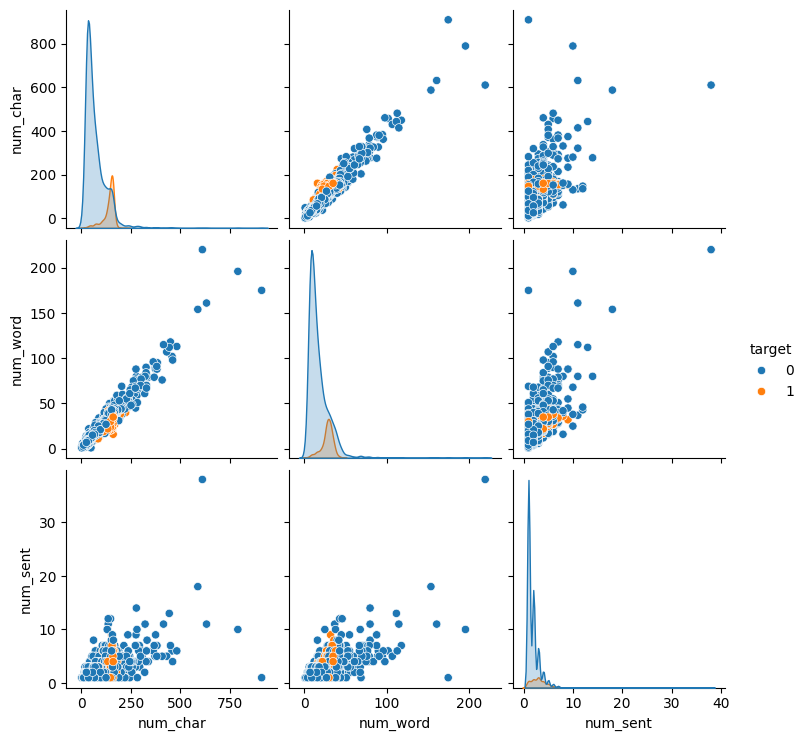

In [26]:
sns.pairplot(df, hue='target')

In [27]:
print(df.dtypes)  # Check data types of all columns


target       int64
SMS         object
num_char     int64
num_word     int64
num_sent     int64
dtype: object


In [28]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,target,num_char,num_word,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_word,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

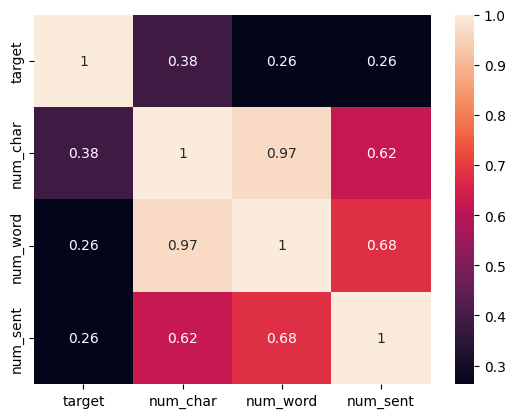

In [29]:
sns.heatmap(numeric_df.corr(), annot=True)

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
ps = PorterStemmer()

In [32]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if(i.isalnum()):
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if(i not in stopwords.words('english') and i not in string.punctuation):
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [33]:
df['transformed_SMS'] = df['SMS'].apply(transform_text)
df.head()

,target,SMS,num_char,num_word,num_sent,transformed_SMS
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_SMS'].str.cat(sep=" "))

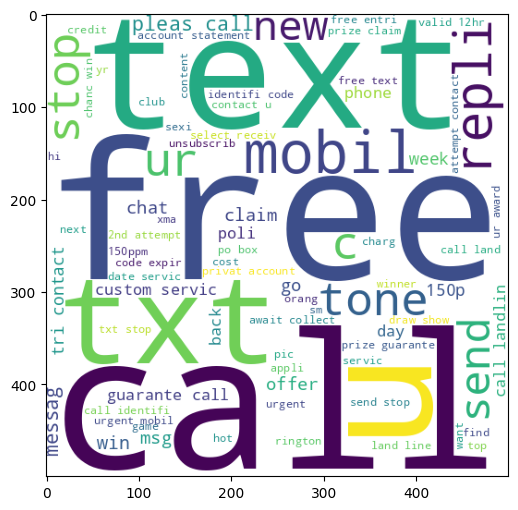

In [35]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

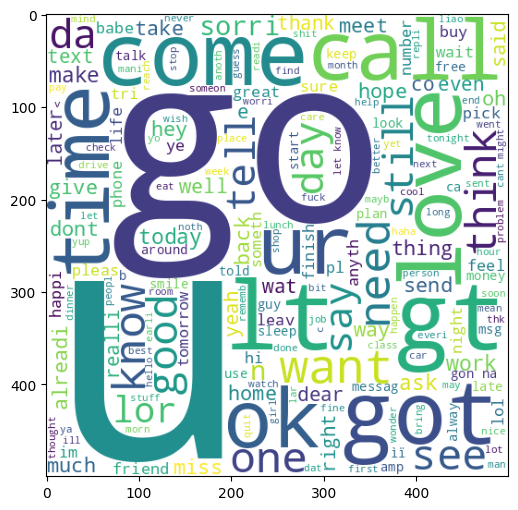

In [36]:
wc = WordCloud(width=500, height=500,min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_SMS'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_SMS'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

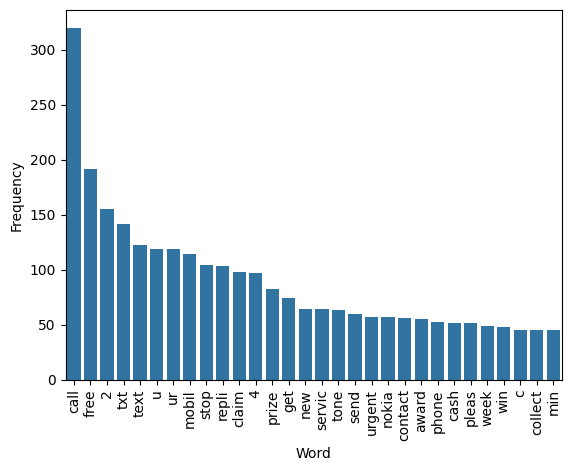

In [39]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
data1 = pd.DataFrame(word_counts, columns=["Word", "Frequency"])
sns.barplot(x="Word", y="Frequency", data=data1)
plt.xticks(rotation='vertical')
plt.show()

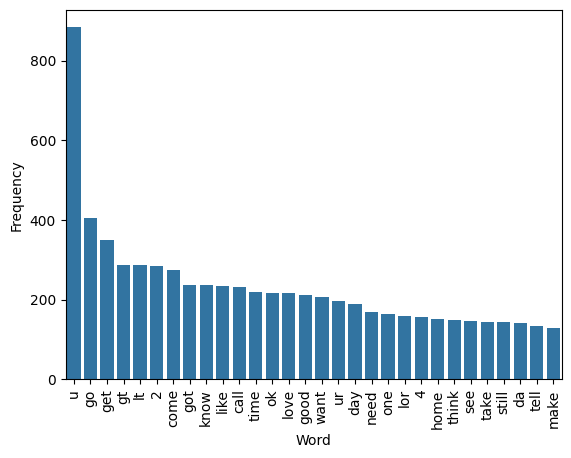

In [40]:
spam_corpus = []
for msg in df[df['target'] == 0]['transformed_SMS'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

word_counts = Counter(spam_corpus).most_common(30)
data1 = pd.DataFrame(word_counts, columns=["Word", "Frequency"])
sns.barplot(x="Word", y="Frequency", data=data1)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_SMS']).toarray()

In [42]:
X.shape

(5169, 3000)

In [43]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [46]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [47]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [48]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [50]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [51]:
combined = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBC': gdbc,
    'xgb': xgb
}

In [52]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [53]:
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)
print(accuracy)
print(precision)

0.9758220502901354
0.9747899159663865


In [54]:
accuracys = []
precisions = []
for name,clf in combined.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f"{name} Accuracy: {current_accuracy}")
  print(f"{name} Precision: {current_precision}")
  accuracys.append(current_accuracy)
  precisions.append(current_precision)

SVC Accuracy: 0.9758220502901354
SVC Precision: 0.9747899159663865
KN Accuracy: 0.9052224371373307
KN Precision: 1.0
NB Accuracy: 0.9709864603481625
NB Precision: 1.0
DT Accuracy: 0.9332688588007737
DT Precision: 0.8415841584158416
LR Accuracy: 0.9555125725338491
LR Precision: 0.96
AdaBoost Accuracy: 0.9216634429400387
AdaBoost Precision: 0.8202247191011236
BgC Accuracy: 0.9584139264990329
BgC Precision: 0.8682170542635659
ETC Accuracy: 0.9748549323017408
ETC Precision: 0.9745762711864406
GBC Accuracy: 0.9506769825918762
GBC Precision: 0.9306930693069307
xgb Accuracy: 0.965183752417795
xgb Precision: 0.9396551724137931


In [55]:
df_performance = pd.  DataFrame({'Algorithm': combined.keys(), 'Accuracy': accuracys, 'Precision': precisions}).sort_values('Precision', ascending=False)

In [56]:
df_performance

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
9,xgb,0.965184,0.939655
8,GBC,0.950677,0.930693
6,BgC,0.958414,0.868217
3,DT,0.933269,0.841584
5,AdaBoost,0.921663,0.820225


In [57]:
performance_df1 = pd.melt(df_performance, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.955513
5,xgb,Accuracy,0.965184
6,GBC,Accuracy,0.950677
7,BgC,Accuracy,0.958414
8,DT,Accuracy,0.933269
9,AdaBoost,Accuracy,0.921663


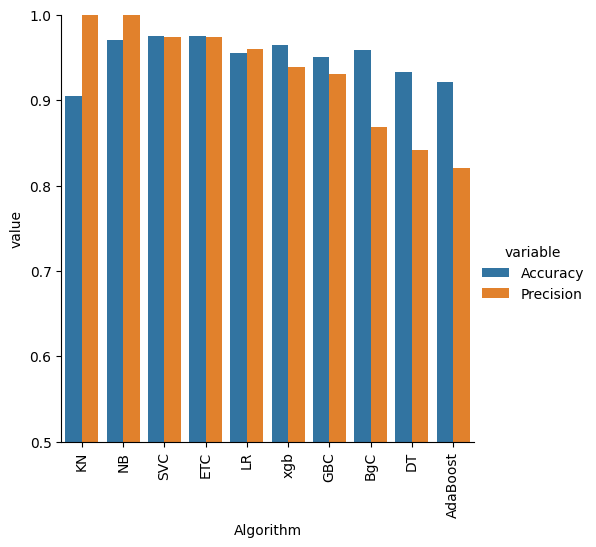

In [58]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1)
plt.xticks(rotation = 'vertical')
plt.show()

In [59]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [60]:
import sklearn
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)
print("Nltk", nltk.__version__)
print("Scikit learn", sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
seaborn 0.13.2
Nltk 3.9.1
Scikit learn 1.6.1


In [76]:

sample_SMS = "hii i saw your presentation today i was very nice would you like to meet me !"
updated_SMS = transform_text(sample_SMS)
vector_input = tfidf.transform([updated_SMS])
prediction = mnb.predict(vector_input)[0]
if prediction == 1:
  print("Spam")
else:
  print("Not Spam")

Not Spam


In [79]:
sample_SMS = "A load of 3 lakhs Rs is approved for you if you receive this SMS. 1 min verification and cash in 1 hour at www.co.uk to opt out reply stop"
updated_SMS = transform_text(sample_SMS)
vector_input = tfidf.transform([updated_SMS])
prediction = mnb.predict(vector_input)[0]
if prediction == 1:
  print("Spam")
else:
  print("Not Spam")

Spam
